In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [2]:
FPKMdata = '/Users/cmdb/qbb2020-answers/Quant_lab/assignment_07/all_annotated.csv'

FPKMdf = pd.read_csv(FPKMdata, sep=',')

# Limit the dataset to genes with a median expression across samples of greater than zero.

In [3]:
filteredFPKMdf = FPKMdf[FPKMdf.median(axis=1, numeric_only = True) > 0]
filteredFPKMdf

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


# Apply a log2(FPKM + 0.1) transformation to the data

In [4]:
column_list = filteredFPKMdf.columns.values.tolist()
non_numeric_df = filteredFPKMdf[column_list[0:2]]
numeric_df = filteredFPKMdf[column_list[2:]]
transformed_df = numeric_df.add(0.1)
transformed_df = np.log2(transformed_df)
transformed_with_gene_cols = pd.concat([non_numeric_df, transformed_df], axis = 1, sort = False)
transformed_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [5]:
transformed_with_gene_cols

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


# Cluster the data matrix for both genes and samples on their patterns of expression (so both the rows and columns of the matrix)

In [6]:
gene_cluster = linkage(transformed_df)
sample_df = transformed_df.transpose()
sample_cluster = linkage(sample_df)
print(sample_cluster)
print(gene_cluster)

[[  2.          10.         148.80233244   2.        ]
 [  0.          16.         161.18226856   3.        ]
 [  8.          17.         167.16634436   4.        ]
 [  4.          12.         176.9596102    2.        ]
 [  7.          15.         199.06693917   2.        ]
 [ 14.          20.         200.97140687   3.        ]
 [  3.          18.         202.90476829   5.        ]
 [  6.          21.         203.82033862   4.        ]
 [  9.          22.         210.29018269   6.        ]
 [ 11.          24.         210.35348062   7.        ]
 [ 19.          25.         223.87927412   9.        ]
 [  5.          13.         225.02139065   2.        ]
 [  1.          26.         230.93512592  10.        ]
 [ 27.          28.         242.4458862   12.        ]
 [ 23.          29.         281.74860023  16.        ]]
[[1.32300000e+03 1.32400000e+03 0.00000000e+00 2.00000000e+00]
 [2.16300000e+03 2.16400000e+03 0.00000000e+00 2.00000000e+00]
 [4.36800000e+03 4.36900000e+03 0.00000000e+00 2

In [7]:
gene_column = filteredFPKMdf["gene_name"]
gene_list = pd.Series.tolist(gene_column)
gene_list

['CR40182',
 'Parp',
 'Alg-2',
 'Tim17b',
 'Tim17b',
 'CG41128',
 'CG41099',
 'CG41099',
 'CG12581',
 'CG12582',
 'CG12582',
 'aux',
 'aux',
 'CG14641',
 'abs',
 'Vps24',
 'CG9795',
 'CG9795',
 'CG9776',
 'Skp2',
 'Skp2',
 'CG1103',
 'CG1103',
 'hkb',
 'CG11739',
 'CG11739',
 'CG11739',
 'CG14646',
 'CG14646',
 'CG9855',
 'CG9855',
 'CG9853',
 'CG9853',
 'CG14647',
 'lost',
 'srl',
 'eIF3-S10',
 'eIF3-S10',
 'CG1074',
 'CG9804',
 'CG9804',
 'CR44134',
 'CG14650',
 'CG31523',
 'CG31523',
 'CG31523',
 'CG14651',
 'Fip1',
 'CG9775',
 'CG9775',
 'MED31',
 'MED31',
 'MED31',
 'MED31',
 'slx1',
 'Dip2',
 'rpk',
 'Karybeta3',
 'Karybeta3',
 'CG9769',
 'tacc',
 'atms',
 'Hus1-like',
 'CG1129',
 'CG1129',
 'CG14657',
 'CG14657',
 'Gnf1',
 'Ubc6',
 'Ubc6',
 'corto',
 'corto',
 'corto',
 'corto',
 'corto',
 'CG12007',
 'cno',
 'CG2604',
 'CG2604',
 'CG2604',
 'Kat60',
 'CG12163',
 'CG12173',
 'Hph',
 'Hph',
 'CR45793',
 'Hph',
 'CR45033',
 'CG11999',
 'CG1161',
 'CG1161',
 'Prosbeta7',
 'Prosbeta

In [8]:
sample_leaves = leaves_list(sample_cluster)
sample_leaves

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12, 11,  9,  3,  8,  0,  2, 10],
      dtype=int32)

In [9]:
sample_names = column_list[2:]
sample_names

['male_10',
 'male_11',
 'male_12',
 'male_13',
 'male_14A',
 'male_14B',
 'male_14C',
 'male_14D',
 'female_10',
 'female_11',
 'female_12',
 'female_13',
 'female_14A',
 'female_14B',
 'female_14C',
 'female_14D']

# Get reordered sample names according to clustering

In [10]:
samples_reordered = ["t_name", "gene_name"]
for leaf in sample_leaves:
    samples_reordered += [sample_names[leaf]]
    
samples_reordered

['t_name',
 'gene_name',
 'male_14C',
 'female_14C',
 'male_14D',
 'female_14D',
 'male_14B',
 'female_14B',
 'male_11',
 'male_14A',
 'female_14A',
 'female_13',
 'female_11',
 'male_13',
 'female_10',
 'male_10',
 'male_12',
 'female_12']

In [11]:
reordered_df = transformed_with_gene_cols.reindex(columns = samples_reordered)
reordered_df

,t_name,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
3,FBtr0302347,CR40182,4.518529,3.851021,3.558602,4.112914,4.749679,4.522507,3.593093,4.240476,4.995485,3.669331,3.809626,3.772605,4.459054,4.573651,4.383186,4.051558
8,FBtr0113885,Parp,4.145813,-3.321928,3.436875,4.665883,-3.321928,2.066050,-3.321928,3.897757,4.353582,3.869772,-3.321928,-3.321928,-3.321928,3.472120,-3.321928,3.905799
9,FBtr0301810,Alg-2,3.801070,2.897078,3.701063,4.516802,2.990301,2.913181,-3.321928,4.484797,4.784754,4.729653,1.594158,4.801878,4.222705,4.260622,3.900371,4.209672
10,FBtr0113895,Tim17b,6.230339,5.621212,5.750615,6.280001,2.945977,4.998373,2.012708,6.072718,6.338167,6.286330,4.081859,6.130167,5.486961,2.681610,2.665469,5.728691
11,FBtr0345179,Tim17b,6.345793,5.736589,5.901059,6.410012,6.953605,5.113628,3.552258,6.188155,6.453632,6.439396,4.196805,6.245611,5.602316,6.899972,6.909741,5.844084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,6.166922,6.239269,6.945737,7.386673,4.675181,5.452891,0.209330,6.681296,7.891809,6.170259,-0.371506,8.696872,6.905339,5.063561,3.312209,5.597221
34665,FBtr0100886,mt:ND1,8.493319,6.523595,7.797501,9.412730,5.778312,4.441070,-0.437467,8.350559,8.760742,8.615611,1.172241,9.014515,8.259794,4.661599,4.418274,7.649749
34667,FBtr0100888,mt:lrRNA,11.283776,9.435277,10.690080,12.153787,9.213941,8.818194,5.095088,11.136488,6.942632,11.867576,6.260317,12.271701,11.332554,11.191931,9.857502,11.087133
34684,FBtr0114261,CR41590,-3.321928,-3.321928,-2.143405,-2.713053,-3.321928,-3.321928,-3.321928,-3.321928,-1.913863,-1.927886,-3.321928,-2.301821,0.003268,-2.534805,-2.348207,-3.321928


# Sample dendrogram

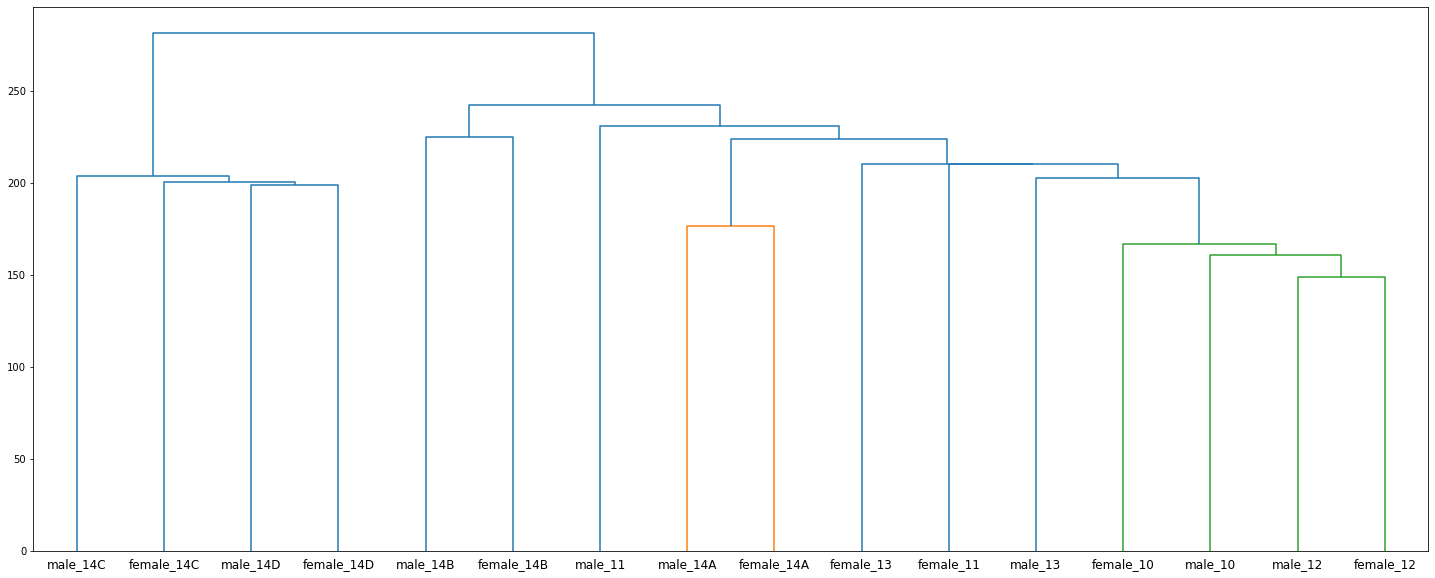

In [12]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(sample_cluster, labels = sample_names)
plt.show()

In [13]:
gene_leaves = leaves_list(gene_cluster)
len(gene_leaves)

8613

In [14]:
gene_leaves

array([2710,  480, 3932, ..., 5684, 2530, 4296], dtype=int32)

In [15]:
gene_leaves_index_list = np.ndarray.tolist(gene_leaves)
gene_leaves_index_list

[2710,
 480,
 3932,
 481,
 3746,
 642,
 4962,
 5856,
 4229,
 1632,
 2630,
 8208,
 7304,
 2526,
 6254,
 3171,
 1014,
 5439,
 3144,
 6610,
 7768,
 567,
 3172,
 1933,
 6789,
 7651,
 4219,
 8346,
 4633,
 5260,
 8200,
 579,
 292,
 4772,
 2308,
 135,
 400,
 2002,
 2003,
 414,
 7280,
 3073,
 1015,
 8369,
 7649,
 6697,
 190,
 3564,
 5283,
 4222,
 4634,
 263,
 8301,
 4784,
 2065,
 2098,
 2289,
 6803,
 5877,
 4317,
 6543,
 1040,
 2581,
 1389,
 5824,
 6846,
 2153,
 7192,
 2719,
 8016,
 7796,
 4108,
 8158,
 5875,
 2391,
 7026,
 7027,
 1715,
 4067,
 7025,
 3784,
 5797,
 1545,
 4195,
 6113,
 7002,
 4903,
 7174,
 7906,
 5327,
 4715,
 464,
 881,
 2622,
 6978,
 2850,
 5514,
 7835,
 1,
 2266,
 1525,
 1633,
 8180,
 8575,
 3594,
 7495,
 7496,
 5874,
 5398,
 5814,
 6936,
 4581,
 41,
 8006,
 633,
 6288,
 5338,
 3960,
 6263,
 8238,
 7107,
 5199,
 6179,
 6180,
 537,
 4272,
 4198,
 7,
 2067,
 2795,
 1310,
 1311,
 509,
 6475,
 4870,
 8573,
 5555,
 8596,
 5167,
 3730,
 7631,
 4935,
 7395,
 7424,
 6538,
 6391,
 6

In [16]:
reordered_df

,t_name,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
3,FBtr0302347,CR40182,4.518529,3.851021,3.558602,4.112914,4.749679,4.522507,3.593093,4.240476,4.995485,3.669331,3.809626,3.772605,4.459054,4.573651,4.383186,4.051558
8,FBtr0113885,Parp,4.145813,-3.321928,3.436875,4.665883,-3.321928,2.066050,-3.321928,3.897757,4.353582,3.869772,-3.321928,-3.321928,-3.321928,3.472120,-3.321928,3.905799
9,FBtr0301810,Alg-2,3.801070,2.897078,3.701063,4.516802,2.990301,2.913181,-3.321928,4.484797,4.784754,4.729653,1.594158,4.801878,4.222705,4.260622,3.900371,4.209672
10,FBtr0113895,Tim17b,6.230339,5.621212,5.750615,6.280001,2.945977,4.998373,2.012708,6.072718,6.338167,6.286330,4.081859,6.130167,5.486961,2.681610,2.665469,5.728691
11,FBtr0345179,Tim17b,6.345793,5.736589,5.901059,6.410012,6.953605,5.113628,3.552258,6.188155,6.453632,6.439396,4.196805,6.245611,5.602316,6.899972,6.909741,5.844084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,6.166922,6.239269,6.945737,7.386673,4.675181,5.452891,0.209330,6.681296,7.891809,6.170259,-0.371506,8.696872,6.905339,5.063561,3.312209,5.597221
34665,FBtr0100886,mt:ND1,8.493319,6.523595,7.797501,9.412730,5.778312,4.441070,-0.437467,8.350559,8.760742,8.615611,1.172241,9.014515,8.259794,4.661599,4.418274,7.649749
34667,FBtr0100888,mt:lrRNA,11.283776,9.435277,10.690080,12.153787,9.213941,8.818194,5.095088,11.136488,6.942632,11.867576,6.260317,12.271701,11.332554,11.191931,9.857502,11.087133
34684,FBtr0114261,CR41590,-3.321928,-3.321928,-2.143405,-2.713053,-3.321928,-3.321928,-3.321928,-3.321928,-1.913863,-1.927886,-3.321928,-2.301821,0.003268,-2.534805,-2.348207,-3.321928


In [17]:
reordered_df.iloc[2710, :]

t_name        FBtr0076479
gene_name           RpS17
male_14C          11.6279
female_14C       -3.32193
male_14D          6.51301
female_14D        9.77081
male_14B          9.91534
female_14B        10.5946
male_11           9.67497
male_14A          10.1861
female_14A        9.66946
female_13         11.0419
female_11         9.91106
male_13           10.5334
female_10        -3.32193
male_10           10.3624
male_12           10.7307
female_12          9.1536
Name: 10838, dtype: object

In [18]:
t_reordered_df = reordered_df
t_reordered_df.set_index("t_name", inplace = True)
t_reordered_df

,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
t_name,,,,,,,,,,,,,,,,,
FBtr0302347,CR40182,4.518529,3.851021,3.558602,4.112914,4.749679,4.522507,3.593093,4.240476,4.995485,3.669331,3.809626,3.772605,4.459054,4.573651,4.383186,4.051558
FBtr0113885,Parp,4.145813,-3.321928,3.436875,4.665883,-3.321928,2.066050,-3.321928,3.897757,4.353582,3.869772,-3.321928,-3.321928,-3.321928,3.472120,-3.321928,3.905799
FBtr0301810,Alg-2,3.801070,2.897078,3.701063,4.516802,2.990301,2.913181,-3.321928,4.484797,4.784754,4.729653,1.594158,4.801878,4.222705,4.260622,3.900371,4.209672
FBtr0113895,Tim17b,6.230339,5.621212,5.750615,6.280001,2.945977,4.998373,2.012708,6.072718,6.338167,6.286330,4.081859,6.130167,5.486961,2.681610,2.665469,5.728691
FBtr0345179,Tim17b,6.345793,5.736589,5.901059,6.410012,6.953605,5.113628,3.552258,6.188155,6.453632,6.439396,4.196805,6.245611,5.602316,6.899972,6.909741,5.844084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,mt:Cyt-b,6.166922,6.239269,6.945737,7.386673,4.675181,5.452891,0.209330,6.681296,7.891809,6.170259,-0.371506,8.696872,6.905339,5.063561,3.312209,5.597221
FBtr0100886,mt:ND1,8.493319,6.523595,7.797501,9.412730,5.778312,4.441070,-0.437467,8.350559,8.760742,8.615611,1.172241,9.014515,8.259794,4.661599,4.418274,7.649749
FBtr0100888,mt:lrRNA,11.283776,9.435277,10.690080,12.153787,9.213941,8.818194,5.095088,11.136488,6.942632,11.867576,6.260317,12.271701,11.332554,11.191931,9.857502,11.087133


In [19]:
transcripts = t_reordered_df.index.values.tolist()
transcripts

['FBtr0302347',
 'FBtr0113885',
 'FBtr0301810',
 'FBtr0113895',
 'FBtr0345179',
 'FBtr0301812',
 'FBtr0113990',
 'FBtr0113989',
 'FBtr0078962',
 'FBtr0078964',
 'FBtr0336702',
 'FBtr0078966',
 'FBtr0336705',
 'FBtr0078985',
 'FBtr0078967',
 'FBtr0078958',
 'FBtr0336484',
 'FBtr0336483',
 'FBtr0078955',
 'FBtr0078953',
 'FBtr0344740',
 'FBtr0078909',
 'FBtr0111220',
 'FBtr0078951',
 'FBtr0078914',
 'FBtr0078915',
 'FBtr0078916',
 'FBtr0302339',
 'FBtr0078919',
 'FBtr0339552',
 'FBtr0078950',
 'FBtr0344215',
 'FBtr0078949',
 'FBtr0290222',
 'FBtr0078921',
 'FBtr0078946',
 'FBtr0346646',
 'FBtr0078944',
 'FBtr0078925',
 'FBtr0346735',
 'FBtr0078943',
 'FBtr0335428',
 'FBtr0078926',
 'FBtr0078938',
 'FBtr0078935',
 'FBtr0078936',
 'FBtr0299947',
 'FBtr0078928',
 'FBtr0078894',
 'FBtr0301297',
 'FBtr0078856',
 'FBtr0078857',
 'FBtr0305312',
 'FBtr0336456',
 'FBtr0301296',
 'FBtr0078893',
 'FBtr0078859',
 'FBtr0078860',
 'FBtr0336462',
 'FBtr0078892',
 'FBtr0302614',
 'FBtr0078868',
 'FBtr00

In [20]:
transcripts_reordered = []
for index in gene_leaves_index_list:
    #print(index)
    transcripts_reordered += [transcripts[index]]
    
transcripts_reordered

['FBtr0076479',
 'FBtr0334681',
 'FBtr0302223',
 'FBtr0082136',
 'FBtr0086092',
 'FBtr0082506',
 'FBtr0086322',
 'FBtr0070992',
 'FBtr0088249',
 'FBtr0331360',
 'FBtr0076656',
 'FBtr0080887',
 'FBtr0077515',
 'FBtr0076842',
 'FBtr0303338',
 'FBtr0075387',
 'FBtr0083397',
 'FBtr0345321',
 'FBtr0075495',
 'FBtr0074276',
 'FBtr0079874',
 'FBtr0302586',
 'FBtr0333596',
 'FBtr0085634',
 'FBtr0074657',
 'FBtr0079615',
 'FBtr0088258',
 'FBtr0081213',
 'FBtr0087258',
 'FBtr0072219',
 'FBtr0080861',
 'FBtr0304709',
 'FBtr0081815',
 'FBtr0345524',
 'FBtr0073079',
 'FBtr0078749',
 'FBtr0301524',
 'FBtr0339146',
 'FBtr0346150',
 'FBtr0082049',
 'FBtr0077603',
 'FBtr0075549',
 'FBtr0083398',
 'FBtr0081261',
 'FBtr0079618',
 'FBtr0074439',
 'FBtr0078652',
 'FBtr0078357',
 'FBtr0072156',
 'FBtr0088253',
 'FBtr0087255',
 'FBtr0081780',
 'FBtr0081133',
 'FBtr0086890',
 'FBtr0072576',
 'FBtr0072583',
 'FBtr0302300',
 'FBtr0342879',
 'FBtr0070962',
 'FBtr0088007',
 'FBtr0300391',
 'FBtr0089413',
 'FBtr00

In [21]:
len(transcripts_reordered)

8613

In [22]:
#Cluster by transcripts
cluster_df = t_reordered_df.reindex(transcripts_reordered)
cluster_df

,gene_name,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
t_name,,,,,,,,,,,,,,,,,
FBtr0076479,RpS17,11.627885,-3.321928,6.513012,9.770807,9.915343,10.594618,9.674967,10.186101,9.669459,11.041927,9.911055,10.533361,-3.321928,10.362427,10.730739,9.153596
FBtr0334681,RpS29,-3.321928,-3.321928,6.690422,-3.321928,-3.321928,6.329519,4.495864,-3.321928,6.838377,-3.321928,5.681848,6.306998,-3.321928,5.834810,5.910958,5.848470
FBtr0302223,CG30382,-3.321928,-3.321928,-3.321928,-3.321928,7.333518,-3.321928,-3.321928,7.029427,6.888902,-3.321928,6.486714,-3.321928,6.008203,6.116518,6.332019,6.112357
FBtr0082136,RpS29,11.891232,-3.321928,11.521811,11.715662,11.456581,10.977238,9.584416,11.426619,11.347327,11.210067,9.876014,10.903922,10.592872,10.616585,10.723743,10.790580
FBtr0086092,CG10417,-3.321928,4.011398,7.226825,6.482741,4.775450,-3.321928,-3.321928,-3.321928,4.906105,6.536656,5.750684,6.886073,4.165947,5.608112,-3.321928,3.429699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0089617,tra2,-3.321928,1.510554,-3.321928,-3.321928,0.565386,2.556431,4.215109,3.022511,2.514033,2.975323,4.404787,2.796918,3.743997,3.697081,3.753138,4.144922
FBtr0343356,Crag,-3.321928,1.904281,-3.321928,-3.321928,2.203526,3.742785,4.456723,3.133134,3.082398,3.918539,3.644903,2.515062,4.032783,3.928964,2.938631,4.015114
FBtr0070627,CG2938,-3.321928,1.252376,-3.321928,-3.321928,4.190093,5.551469,3.595382,4.846243,5.205921,3.524966,4.244179,4.142772,2.719274,3.654464,5.371957,4.159932


# Plot a heatmap. Order the rows and columns on the heatmap based on your clustering order

In [23]:
cluster_columns = cluster_df.columns.values.tolist()
numeric_cluster_df = cluster_df[cluster_columns[1:]]
numeric_cluster_df

,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
t_name,,,,,,,,,,,,,,,,
FBtr0076479,11.627885,-3.321928,6.513012,9.770807,9.915343,10.594618,9.674967,10.186101,9.669459,11.041927,9.911055,10.533361,-3.321928,10.362427,10.730739,9.153596
FBtr0334681,-3.321928,-3.321928,6.690422,-3.321928,-3.321928,6.329519,4.495864,-3.321928,6.838377,-3.321928,5.681848,6.306998,-3.321928,5.834810,5.910958,5.848470
FBtr0302223,-3.321928,-3.321928,-3.321928,-3.321928,7.333518,-3.321928,-3.321928,7.029427,6.888902,-3.321928,6.486714,-3.321928,6.008203,6.116518,6.332019,6.112357
FBtr0082136,11.891232,-3.321928,11.521811,11.715662,11.456581,10.977238,9.584416,11.426619,11.347327,11.210067,9.876014,10.903922,10.592872,10.616585,10.723743,10.790580
FBtr0086092,-3.321928,4.011398,7.226825,6.482741,4.775450,-3.321928,-3.321928,-3.321928,4.906105,6.536656,5.750684,6.886073,4.165947,5.608112,-3.321928,3.429699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0089617,-3.321928,1.510554,-3.321928,-3.321928,0.565386,2.556431,4.215109,3.022511,2.514033,2.975323,4.404787,2.796918,3.743997,3.697081,3.753138,4.144922
FBtr0343356,-3.321928,1.904281,-3.321928,-3.321928,2.203526,3.742785,4.456723,3.133134,3.082398,3.918539,3.644903,2.515062,4.032783,3.928964,2.938631,4.015114
FBtr0070627,-3.321928,1.252376,-3.321928,-3.321928,4.190093,5.551469,3.595382,4.846243,5.205921,3.524966,4.244179,4.142772,2.719274,3.654464,5.371957,4.159932


# Heatmap before clustering

<AxesSubplot:>

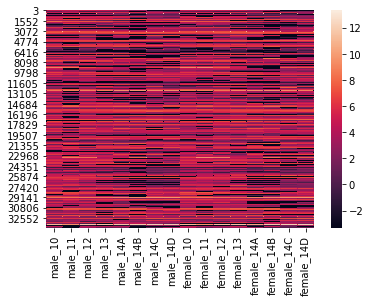

In [24]:
sns.heatmap(transformed_df)

# Heatmap after clustering

<AxesSubplot:ylabel='t_name'>

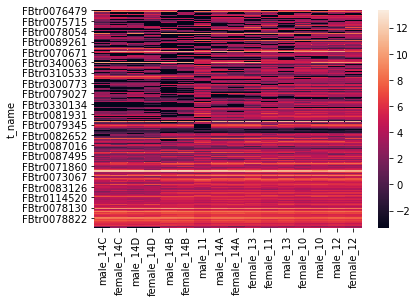

In [25]:
sns.heatmap(numeric_cluster_df)

# Differential Expression Analysis

#Use ordinary least squares regression to test for genes that are differentially expressed across stages. Use the stage number as a numeric independent variable (10, 11, 12, 13, 14), and ignore the letter suffixes on day 14 (i.e., treat 14A, 14B, 14C, and 14D as equivalent).

In [26]:
transformed_with_gene_cols

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [27]:
#Pull out the t_name column and set as index
transformed_t_index = transformed_with_gene_cols
transformed_t_index.set_index("t_name", inplace = True)
transformed_t_index

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,,
FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [28]:
#remove gene name column
column_list = transformed_t_index.columns.values.tolist()
transformed_numeric_df = transformed_t_index[column_list[1:]]
transformed_numeric_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,
FBtr0302347,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
FBtr0113885,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
FBtr0301810,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
FBtr0113895,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
FBtr0345179,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
FBtr0100886,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
FBtr0100888,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [29]:
#transpose the dataframe
transformed_transposed = transformed_numeric_df.transpose()
transformed_transposed

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,3.095164,...,1.140935,3.889324,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145


In [30]:
#regression for each transcript
pvalues = []
betas = []
column_list = transformed_transposed.columns.values.tolist()
for transcript in column_list:
    #pull out each column (transcript and its data) one at a time and convert to a df
    col_of_interest = transformed_transposed[transcript].to_frame()
    stage = [10, 11, 12, 13, 14, 14, 14, 14, 10, 11, 12, 13, 14, 14, 14, 14]
    sex = []
    sex += ["male"]*8
    sex += ["female"]*8
    col_of_interest["Stage"] = stage #add labels to data for regression
    col_of_interest["Sex"] = sex
    model = smf.ols(formula = transcript + ' ~ Stage', data = col_of_interest) 
    results = model.fit()
    pvalues += [results.pvalues[1]]
    betas += [results.params[1]]

In [31]:
differential_expression_df = transformed_t_index
differential_expression_df["Pvalue"] = pvalues
differential_expression_df['logP'] = -1 * np.log10(differential_expression_df['Pvalue'])
differential_expression_df["Beta"] = betas
differential_expression_df

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,Pvalue,logP,Beta
t_name,,,,,,,,,,,,,,,,,,,,
FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.735893,0.133186,0.026464
FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.162378,0.789473,0.880440
FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.263080,0.579912,0.388746
FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.031521,1.501404,0.542177
FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.221445,0.654735,0.201195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.049018,1.309643,0.820108
FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.051185,1.290861,0.942403
FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.546605,0.262326,0.231565


In [32]:
differential_expression_sorted = differential_expression_df.sort_values(by = "Pvalue")
differential_expression_sorted

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,Pvalue,logP,Beta
t_name,,,,,,,,,,,,,,,,,,,,
FBtr0071924,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,-1.926388,0.743958,3.041501,5.447027,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072
FBtr0330249,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,-1.926388,0.743958,3.041501,5.447027,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072
FBtr0343014,Ppa,-2.757921,-1.010463,0.964879,2.730028,5.030037,5.730386,5.014984,5.223058,-3.088715,-2.058665,0.538236,2.824551,5.227741,5.529569,5.517070,5.568777,1.454301e-14,13.837346,2.150359
FBtr0080193,CG14915,-0.573671,2.517926,5.271851,6.672216,9.273713,10.707383,10.765094,9.936892,-3.321928,1.785946,4.671269,7.571202,8.974607,10.128719,10.616256,10.029714,1.047712e-11,10.979758,2.852146
FBtr0072872,CG8960,2.622915,4.726886,6.577100,7.652086,8.635040,9.586184,9.550375,9.477485,1.284198,4.843847,6.146218,8.205575,8.842453,9.884245,9.931557,9.278339,2.536184e-11,10.595819,1.740305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0071095,RpS14a,6.996359,5.366751,7.246201,5.995301,8.084568,7.596964,8.229569,8.656007,6.843780,7.098358,6.714206,5.595306,7.862595,8.733305,2.750894,2.061335,9.985308e-01,0.000639,0.000630
FBtr0345315,CG2924,7.568373,6.156295,7.145531,7.802248,7.620958,5.233056,5.246150,5.496082,6.153561,7.336475,1.513616,5.151283,7.416465,7.122243,7.384779,6.151041,9.987745e-01,0.000533,-0.000434
FBtr0300247,CG7215,5.522254,-0.982674,5.845094,-1.750154,-1.196426,-1.135123,2.202453,2.352459,-1.659964,-1.411249,-1.704479,-1.327153,-1.199474,-1.129762,2.458673,5.908777,9.991114e-01,0.000386,0.000579


# QQ plot

In [33]:
#generate expected pvalues (uniform distribution) for QQ plot and add to df
differential_expression_sorted['uniform_points'] = range(0, len(differential_expression_sorted))
differential_expression_sorted['uniform_pval'] = (differential_expression_sorted['uniform_points'] + 1) / len(differential_expression_sorted)
differential_expression_sorted['uniform_logP'] = -1 * np.log10(differential_expression_sorted['uniform_pval'])
differential_expression_sorted

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,...,female_14A,female_14B,female_14C,female_14D,Pvalue,logP,Beta,uniform_points,uniform_pval,uniform_logP
t_name,,,,,,,,,,,,,,,,,,,,,
FBtr0071924,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,...,5.447027,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072,0,0.000116,3.935154
FBtr0330249,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,...,5.447027,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072,1,0.000232,3.634124
FBtr0343014,Ppa,-2.757921,-1.010463,0.964879,2.730028,5.030037,5.730386,5.014984,5.223058,-3.088715,...,5.227741,5.529569,5.517070,5.568777,1.454301e-14,13.837346,2.150359,2,0.000348,3.458033
FBtr0080193,CG14915,-0.573671,2.517926,5.271851,6.672216,9.273713,10.707383,10.765094,9.936892,-3.321928,...,8.974607,10.128719,10.616256,10.029714,1.047712e-11,10.979758,2.852146,3,0.000464,3.333094
FBtr0072872,CG8960,2.622915,4.726886,6.577100,7.652086,8.635040,9.586184,9.550375,9.477485,1.284198,...,8.842453,9.884245,9.931557,9.278339,2.536184e-11,10.595819,1.740305,4,0.000581,3.236184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0071095,RpS14a,6.996359,5.366751,7.246201,5.995301,8.084568,7.596964,8.229569,8.656007,6.843780,...,7.862595,8.733305,2.750894,2.061335,9.985308e-01,0.000639,0.000630,8608,0.999536,0.000202
FBtr0345315,CG2924,7.568373,6.156295,7.145531,7.802248,7.620958,5.233056,5.246150,5.496082,6.153561,...,7.416465,7.122243,7.384779,6.151041,9.987745e-01,0.000533,-0.000434,8609,0.999652,0.000151
FBtr0300247,CG7215,5.522254,-0.982674,5.845094,-1.750154,-1.196426,-1.135123,2.202453,2.352459,-1.659964,...,-1.199474,-1.129762,2.458673,5.908777,9.991114e-01,0.000386,0.000579,8610,0.999768,0.000101


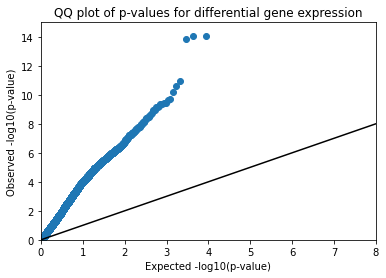

In [34]:
#Plotting
fig, ax = plt.subplots()

ax.scatter(differential_expression_sorted["uniform_logP"], differential_expression_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlim([0, 8])
plt.ylim([0, 15])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
ax.set_title("QQ plot of p-values for differential gene expression")
    
plt.show()

# False discovery rate correction

In [35]:
fdr = statsmodels.stats.multitest.fdrcorrection(differential_expression_sorted["Pvalue"], alpha=0.1)
fdr

(array([ True,  True,  True, ..., False, False, False]),
 array([3.55739510e-11, 3.55739510e-11, 4.17529767e-11, ...,
        9.99343422e-01, 9.99652011e-01, 9.99963374e-01]))

In [36]:
sig_genes = []
for num in range(0, len(fdr[0])):
    if fdr[1][num] < 0.1:
        sig_genes += [fdr[1][num]]
        
len(sig_genes)

3790

In [37]:
#Add corrected pvalues to df
differential_expression_sorted["Pvalue-corrected"] = fdr[1]
differential_expression_sorted

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,...,female_14B,female_14C,female_14D,Pvalue,logP,Beta,uniform_points,uniform_pval,uniform_logP,Pvalue-corrected
t_name,,,,,,,,,,,,,,,,,,,,,
FBtr0071924,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,...,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072,0,0.000116,3.935154,3.557395e-11
FBtr0330249,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,...,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072,1,0.000232,3.634124,3.557395e-11
FBtr0343014,Ppa,-2.757921,-1.010463,0.964879,2.730028,5.030037,5.730386,5.014984,5.223058,-3.088715,...,5.529569,5.517070,5.568777,1.454301e-14,13.837346,2.150359,2,0.000348,3.458033,4.175298e-11
FBtr0080193,CG14915,-0.573671,2.517926,5.271851,6.672216,9.273713,10.707383,10.765094,9.936892,-3.321928,...,10.128719,10.616256,10.029714,1.047712e-11,10.979758,2.852146,3,0.000464,3.333094,2.255985e-08
FBtr0072872,CG8960,2.622915,4.726886,6.577100,7.652086,8.635040,9.586184,9.550375,9.477485,1.284198,...,9.884245,9.931557,9.278339,2.536184e-11,10.595819,1.740305,4,0.000581,3.236184,4.368830e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0071095,RpS14a,6.996359,5.366751,7.246201,5.995301,8.084568,7.596964,8.229569,8.656007,6.843780,...,8.733305,2.750894,2.061335,9.985308e-01,0.000639,0.000630,8608,0.999536,0.000202,9.989947e-01
FBtr0345315,CG2924,7.568373,6.156295,7.145531,7.802248,7.620958,5.233056,5.246150,5.496082,6.153561,...,7.122243,7.384779,6.151041,9.987745e-01,0.000533,-0.000434,8609,0.999652,0.000151,9.991225e-01
FBtr0300247,CG7215,5.522254,-0.982674,5.845094,-1.750154,-1.196426,-1.135123,2.202453,2.352459,-1.659964,...,-1.129762,2.458673,5.908777,9.991114e-01,0.000386,0.000579,8610,0.999768,0.000101,9.993434e-01


In [38]:
#make a subset of the df with only the significant genes
sig_genes_df = differential_expression_sorted[differential_expression_sorted["Pvalue-corrected"] < 0.1]
sig_genes_df

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,...,female_14B,female_14C,female_14D,Pvalue,logP,Beta,uniform_points,uniform_pval,uniform_logP,Pvalue-corrected
t_name,,,,,,,,,,,,,,,,,,,,,
FBtr0071924,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,...,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072,0,0.000116,3.935154,3.557395e-11
FBtr0330249,Ppa,-2.683076,-0.832308,1.174226,2.946782,5.249243,5.949833,5.234184,5.442342,-3.053685,...,5.748959,5.736456,5.788178,8.260525e-15,14.082992,2.183072,1,0.000232,3.634124,3.557395e-11
FBtr0343014,Ppa,-2.757921,-1.010463,0.964879,2.730028,5.030037,5.730386,5.014984,5.223058,-3.088715,...,5.529569,5.517070,5.568777,1.454301e-14,13.837346,2.150359,2,0.000348,3.458033,4.175298e-11
FBtr0080193,CG14915,-0.573671,2.517926,5.271851,6.672216,9.273713,10.707383,10.765094,9.936892,-3.321928,...,10.128719,10.616256,10.029714,1.047712e-11,10.979758,2.852146,3,0.000464,3.333094,2.255985e-08
FBtr0072872,CG8960,2.622915,4.726886,6.577100,7.652086,8.635040,9.586184,9.550375,9.477485,1.284198,...,9.884245,9.931557,9.278339,2.536184e-11,10.595819,1.740305,4,0.000581,3.236184,4.368830e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0304118,SmB,6.257771,-3.321928,6.848822,6.679883,7.688734,8.370158,7.763633,8.259091,6.422919,...,8.482751,8.135194,7.780541,4.362895e-02,1.360225,0.927023,3785,0.439568,0.356974,9.925413e-02
FBtr0072219,Nap1,8.346045,7.184010,5.995572,-3.321928,5.512063,-3.321928,7.326074,-3.321928,8.206623,...,-3.321928,5.482487,6.186725,4.367169e-02,1.359800,-1.555407,3786,0.439684,0.356859,9.932513e-02
FBtr0076494,CG4080,4.709413,5.376638,4.610037,4.749435,4.426629,-3.321928,1.737152,3.551755,4.642102,...,2.773779,3.300080,-3.321928,4.381067e-02,1.358420,-0.907907,3787,0.439800,0.356744,9.961491e-02


In [39]:
sig_genes_list = sig_genes_df.index.values.tolist()
sig_genes_list

['FBtr0071924',
 'FBtr0330249',
 'FBtr0343014',
 'FBtr0080193',
 'FBtr0072872',
 'FBtr0075112',
 'FBtr0075101',
 'FBtr0112407',
 'FBtr0082648',
 'FBtr0080306',
 'FBtr0071953',
 'FBtr0100130',
 'FBtr0078951',
 'FBtr0075323',
 'FBtr0071155',
 'FBtr0333052',
 'FBtr0080237',
 'FBtr0076372',
 'FBtr0345480',
 'FBtr0333035',
 'FBtr0086268',
 'FBtr0112690',
 'FBtr0083847',
 'FBtr0075603',
 'FBtr0345792',
 'FBtr0075782',
 'FBtr0302567',
 'FBtr0329904',
 'FBtr0333034',
 'FBtr0087676',
 'FBtr0078060',
 'FBtr0345793',
 'FBtr0074086',
 'FBtr0082980',
 'FBtr0071048',
 'FBtr0344632',
 'FBtr0073763',
 'FBtr0086560',
 'FBtr0302512',
 'FBtr0333162',
 'FBtr0070749',
 'FBtr0344530',
 'FBtr0342758',
 'FBtr0340365',
 'FBtr0072449',
 'FBtr0072810',
 'FBtr0084435',
 'FBtr0337051',
 'FBtr0078218',
 'FBtr0082570',
 'FBtr0077130',
 'FBtr0088727',
 'FBtr0346640',
 'FBtr0345982',
 'FBtr0078630',
 'FBtr0346539',
 'FBtr0076496',
 'FBtr0083541',
 'FBtr0078083',
 'FBtr0080398',
 'FBtr0071143',
 'FBtr0340030',
 'FBtr00

In [40]:
len(sig_genes_list)

3790

In [41]:
#Repeat the analysis while controlling for sex
pvalues_sex = []
betas_sex = []
column_list = transformed_transposed.columns.values.tolist()
for transcript in column_list:
    col_of_interest = transformed_transposed[transcript].to_frame()
    stage = [10, 11, 12, 13, 14, 14, 14, 14, 10, 11, 12, 13, 14, 14, 14, 14]
    sex = []
    sex += ["male"]*8
    sex += ["female"]*8
    col_of_interest["Stage"] = stage
    col_of_interest["Sex"] = sex
    model = smf.ols(formula = transcript + ' ~ Stage + Sex', data = col_of_interest) 
    results = model.fit()
    pvalues_sex += [results.pvalues[2]]
    betas_sex += [results.params[2]]

In [42]:
#Add pvalues from new analysis to new df
differential_expression_sex_df = transformed_t_index
differential_expression_sex_df["Pvalue"] = pvalues_sex
differential_expression_sex_df['logP'] = -1 * np.log10(differential_expression_df['Pvalue'])
differential_expression_sex_df["Beta"] = betas_sex
differential_expression_sex_df

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,Pvalue,logP,Beta
t_name,,,,,,,,,,,,,,,,,,,,
FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.745479,0.127565,0.026464
FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.174987,0.756994,0.880440
FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.274123,0.562054,0.388746
FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.018751,1.726984,0.542177
FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.227350,0.643304,0.201195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.056993,1.244182,0.820108
FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.057250,1.242227,0.942403
FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.560402,0.251500,0.231565


In [43]:
#perform false discovery rate control again and subset new df for significant genes controlling for sex
fdr_sex = statsmodels.stats.multitest.fdrcorrection(differential_expression_sex_df["Pvalue"], alpha=0.1)
differential_expression_sex_df["Pvalue-corrected"] = fdr_sex[1]
sig_genes_sex_df = differential_expression_sex_df[differential_expression_sex_df["Pvalue-corrected"] < 0.1]
sig_genes_sex_df

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,...,female_12,female_13,female_14A,female_14B,female_14C,female_14D,Pvalue,logP,Beta,Pvalue-corrected
t_name,,,,,,,,,,,,,,,,,,,,,
FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,...,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.018751,1.726984,0.542177,0.054378
FBtr0301812,CG41128,2.705093,-3.321928,3.387643,4.529754,4.658374,4.435483,5.110117,4.143877,3.885497,...,4.180349,4.894166,5.070394,3.463944,4.055034,5.210168,0.027936,1.553842,0.742588,0.073425
FBtr0078962,CG12581,-3.321928,-3.321928,-3.321928,-3.321928,3.465782,4.839966,6.834119,7.222319,-3.321928,...,-3.321928,-3.321928,4.410834,4.547454,7.034024,7.175523,0.000154,3.811548,2.575194,0.001538
FBtr0078985,CG14641,6.637172,6.591033,6.890134,6.969027,7.518327,7.748548,7.948051,7.958587,6.430046,...,6.821103,6.998032,7.378962,7.438458,7.957329,7.900571,0.000004,5.388554,0.324045,0.000154
FBtr0078967,abs,4.493204,4.469153,4.805691,4.852776,5.213607,5.128309,5.381846,5.374848,4.517198,...,4.616802,4.826213,5.049368,5.347315,5.549579,5.340620,0.000003,5.537628,0.219024,0.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100861,mt:CoI,6.373076,2.792871,5.785681,8.326924,9.147208,6.053799,7.820703,6.964940,6.662423,...,6.855411,7.243006,10.412600,6.935831,6.714474,10.177214,0.016554,1.781099,0.769427,0.049455
FBtr0100864,mt:tRNA:K,-0.666904,-0.612410,-3.321928,3.069504,3.770951,2.357381,2.952242,2.865792,2.105880,...,0.743411,2.583839,5.493103,0.531897,1.901490,4.471517,0.010657,1.972384,1.048731,0.035343
FBtr0100866,mt:ATPase8,-3.321928,-3.321928,-3.321928,-0.664672,1.525487,0.489144,0.705399,-3.321928,-3.321928,...,-3.321928,-1.372247,2.229300,-1.288332,0.836971,2.523567,0.000907,3.042523,1.114158,0.005585


In [44]:
#subset also the insignificant genes for volcano plot later
insig_genes_sex_df = differential_expression_sex_df[differential_expression_sex_df["Pvalue-corrected"] >= 0.1]
insig_genes_sex_df

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,...,female_12,female_13,female_14A,female_14B,female_14C,female_14D,Pvalue,logP,Beta,Pvalue-corrected
t_name,,,,,,,,,,,,,,,,,,,,,
FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,...,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.745479,0.127565,0.026464,0.816203
FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,...,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.174987,0.756994,0.880440,0.281871
FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,...,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.274123,0.562054,0.388746,0.391546
FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,...,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.227350,0.643304,0.201195,0.342817
FBtr0113990,CG41099,4.756461,-3.321928,-3.321928,4.852629,4.892474,-3.321928,4.421782,2.423376,4.157226,...,5.288071,4.692168,5.784683,-3.321928,-3.321928,-3.321928,0.801017,0.096358,-0.190887,0.860517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,...,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.056993,1.244182,0.820108,0.123678
FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,...,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.057250,1.242227,0.942403,0.124048
FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,...,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.560402,0.251500,0.231565,0.669823


In [45]:
sig_genes_sex_list = sig_genes_sex_df.index.values.tolist()
sig_genes_sex_list

['FBtr0113895',
 'FBtr0301812',
 'FBtr0078962',
 'FBtr0078985',
 'FBtr0078967',
 'FBtr0078958',
 'FBtr0078955',
 'FBtr0078951',
 'FBtr0078914',
 'FBtr0078915',
 'FBtr0339552',
 'FBtr0078950',
 'FBtr0290222',
 'FBtr0078921',
 'FBtr0078946',
 'FBtr0078944',
 'FBtr0078938',
 'FBtr0078935',
 'FBtr0299947',
 'FBtr0078928',
 'FBtr0078894',
 'FBtr0301297',
 'FBtr0078859',
 'FBtr0078892',
 'FBtr0302614',
 'FBtr0078868',
 'FBtr0078876',
 'FBtr0078837',
 'FBtr0308120',
 'FBtr0078822',
 'FBtr0078821',
 'FBtr0334276',
 'FBtr0344333',
 'FBtr0334275',
 'FBtr0344334',
 'FBtr0078806',
 'FBtr0078805',
 'FBtr0078787',
 'FBtr0100433',
 'FBtr0330026',
 'FBtr0078682',
 'FBtr0078767',
 'FBtr0344635',
 'FBtr0344273',
 'FBtr0078766',
 'FBtr0344274',
 'FBtr0336770',
 'FBtr0078758',
 'FBtr0078688',
 'FBtr0078699',
 'FBtr0078751',
 'FBtr0078745',
 'FBtr0078704',
 'FBtr0078740',
 'FBtr0078705',
 'FBtr0114327',
 'FBtr0078706',
 'FBtr0335215',
 'FBtr0078737',
 'FBtr0078736',
 'FBtr0078712',
 'FBtr0078727',
 'FBtr03

# Percent overlap

In [46]:
overlap_list = []
for transcript in sig_genes_sex_list:
    if transcript in sig_genes_list:
        overlap_list += [transcript]
        
print(len(sig_genes_list))
print(len(sig_genes_sex_list))
print(len(overlap_list))
print('percent overlap:', len(overlap_list)/len(sig_genes_list)*100)

3790
3667
3648
percent overlap: 96.25329815303431


In [47]:
fs = open('/Users/cmdb/qbb2020-answers/Quant_lab/assignment_07/percent_overlap.txt', 'w+')
fs.write(str(len(overlap_list)/len(sig_genes_list)*100))
fs.close()

In [48]:
#List of differentially expressed genes, with and without sex as a covariate
fs = open('/Users/cmdb/qbb2020-answers/Quant_lab/assignment_07/differentially_expressed_genes.txt', 'w+')
fs.write("Differentially expressed genes without sex as a covariate:" + "\n")
for transcript in sig_genes_list:
    fs.write(transcript + "\n")

fs.write("\n")
fs.write("Differentially expressed genes with sex as a covariate:" + "\n")
for transcript in sig_genes_sex_list:
    fs.write(transcript + "\n")
fs.close()

# Generate a volcano plot of the differential expression, with sex as a covariate, results ( -log10(p-value) on the y-axis, beta on the x axis). Color the significant points in a different color

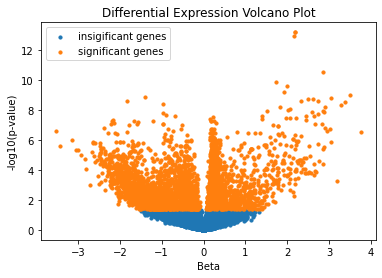

In [54]:
fig, ax = plt.subplots()
ax.set_title("Differential Expression Volcano Plot")
ax.scatter(insig_genes_sex_df["Beta"], insig_genes_sex_df["logP"], s=10, label = 'insigificant genes')
ax.scatter(sig_genes_sex_df["Beta"], sig_genes_sex_df["logP"], s=10, label = 'significant genes')
plt.xlabel("Beta")
plt.ylabel("-log10(p-value)")
ax.legend()

plt.show()